In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


In [3]:
df = pd.read_excel('тестновый.xlsx')


In [4]:
df.head(100)

,TradePointCode,STORE_LOCATION_LVL_NM1,STORE_LOCATION_NM,BrandName,Локация,Выкладка,Revenue,ChequeCount,TradeSquare,mean_ch,high,medium,low,Сердце и кровь,Эндокринология,Онкология и иммунология,Дыхательная система,Лечений инфекций,Костно-мышечная система,От варикоза,Мочеполовая система,Гинекология,Нервная система,Пищеварительный тракт,От боли и воспаления,Дерматология,Зрение и слух,От аллергии,Простуда и грипп,Борьба с вредными привычками,Витамины и обмен веществ,Лечебная и селективная косметика,Масс-маркет,Товары для матери и ребенка,Уход за больными,Медицинская техника,Мед. изделия,Продукты питания,Сердце и кровь_общ,Эндокринология_общ,Онкология и иммунология_общ,Дыхательная система_общ,Лечений инфекций_общ,Костно-мышечная система_общ,От варикоза_общ,Мочеполовая система_общ,Гинекология_общ,Нервная система_общ,Пищеварительный тракт_общ,От боли и воспаления_общ,Дерматология_общ,Зрение и слух_общ,От аллергии_общ,Простуда и грипп_общ,Борьба с вредными привычками_общ,Витамины и обмен веществ_общ,Лечебная и селективная косметика_общ,Масс-маркет_общ,Товары для матери и ребенка_общ,Уход за больными_общ,Медицинская техника_общ,Мед. изделия_общ,Продукты питания_общ
0,А00782,БЕ Москва,А00782 Москва Базовая д.2 стр.1,Аптека.ру,ТЦ,ОФТ,2.050794e+07,64380,26.81,318.545188,0.444617,0.356710,0.198673,0.098948,0.016848,0.006644,0.009094,0.031910,0.049782,0.016513,0.043502,0.030668,0.054816,0.120919,0.057243,0.052302,0.024091,0.016059,0.186066,0.003040,0.064410,0.007485,0.045661,0.004934,0.008988,0.016454,0.028922,0.004701,0.000349,0.000378,0.000204,0.000379,0.000617,0.000356,0.000434,0.000480,0.000319,0.000354,0.000448,0.000593,0.000427,0.000367,0.000428,0.000486,0.000321,0.000326,0.000115,0.000451,0.000430,0.000423,0.000426,0.000472,0.000409
1,А01555,БЕ Москва,"А01555 МО, Ногинский р-н, Автодорога М-7, 5, ...",Доктор Столетов,ТЦ,ОФТ,3.466898e+07,96341,79.70,359.856923,0.426649,0.364880,0.208471,0.093806,0.014445,0.004519,0.007468,0.021199,0.049231,0.015397,0.036595,0.026913,0.046671,0.125150,0.062242,0.059087,0.022536,0.015713,0.185172,0.004180,0.074288,0.022213,0.051611,0.004781,0.007765,0.017235,0.026891,0.004893,0.000559,0.000547,0.000234,0.000525,0.000692,0.000593,0.000683,0.000681,0.000473,0.000509,0.000783,0.001089,0.000815,0.000580,0.000708,0.000817,0.000745,0.000634,0.000577,0.000861,0.000703,0.000617,0.000753,0.000741,0.000718
2,А00472,БЕ Москва,А00472 МО Горки-10 27/2,Доктор Столетов,ТЦ,ОФТ,8.503654e+07,121622,69.70,699.187132,0.636383,0.263632,0.099985,0.122869,0.014509,0.006082,0.006888,0.021213,0.037041,0.012051,0.037221,0.024198,0.058234,0.113769,0.025489,0.046420,0.020883,0.014594,0.134473,0.002721,0.080865,0.097691,0.056292,0.007852,0.010866,0.018132,0.024331,0.005315,0.001799,0.001350,0.000774,0.001191,0.001703,0.001098,0.001314,0.001704,0.001046,0.001561,0.001750,0.001097,0.001574,0.001320,0.001616,0.001458,0.001192,0.001698,0.006239,0.002310,0.002841,0.002124,0.001947,0.001648,0.001918
3,А03096,БЕ Москва,А03096 Москва Академика Понтрягина 14,Доктор Столетов,ТЦ,ОФТ,4.169740e+07,77656,47.30,536.950155,0.588728,0.295467,0.115805,0.056027,0.009186,0.009583,0.006963,0.018092,0.030058,0.010066,0.027567,0.028854,0.038256,0.124954,0.030966,0.056528,0.019940,0.019924,0.164873,0.004245,0.097642,0.111763,0.089709,0.008762,0.002373,0.007838,0.021676,0.004153,0.000402,0.000419,0.000598,0.000590,0.000712,0.000437,0.000538,0.000618,0.000611,0.000503,0.000942,0.000653,0.000939,0.000618,0.001081,0.000876,0.000911,0.001005,0.003498,0.001804,0.001554,0.000227,0.000412,0.000720,0.000735
4,А03171,БЕ Москва,А03171 Москва Красная площадь 3,Доктор Столетов,ТЦ,ОФТ,2.879304e+07,30976,101.30,929.527291,0.695127,0.244987,0.059886,0.039554,0.006447,0.007579,0.002315,0.009481,0.027669,0.005618,0.024013,0.021366,0.044018,0.088327,0.034886,0.030333,0.015305,0.011346,0.115756,0.002017,0.169278,0.166342,0.134607,0.005815,0.000690,0.007833,0.016204,0.013205,0.000196,0.000203,0.000326,0.000135,0.000257,0.000277,0.000207,0.000372,0.000312,0.000399,0.000459,0.

In [5]:
dropr_column = [1,2,3,4,5,6,7]
df.drop(df.columns[dropr_column], axis =  1, inplace = True)
df

,TradePointCode,TradeSquare,mean_ch,high,medium,low,Сердце и кровь,Эндокринология,Онкология и иммунология,Дыхательная система,Лечений инфекций,Костно-мышечная система,От варикоза,Мочеполовая система,Гинекология,Нервная система,Пищеварительный тракт,От боли и воспаления,Дерматология,Зрение и слух,От аллергии,Простуда и грипп,Борьба с вредными привычками,Витамины и обмен веществ,Лечебная и селективная косметика,Масс-маркет,Товары для матери и ребенка,Уход за больными,Медицинская техника,Мед. изделия,Продукты питания,Сердце и кровь_общ,Эндокринология_общ,Онкология и иммунология_общ,Дыхательная система_общ,Лечений инфекций_общ,Костно-мышечная система_общ,От варикоза_общ,Мочеполовая система_общ,Гинекология_общ,Нервная система_общ,Пищеварительный тракт_общ,От боли и воспаления_общ,Дерматология_общ,Зрение и слух_общ,От аллергии_общ,Простуда и грипп_общ,Борьба с вредными привычками_общ,Витамины и обмен веществ_общ,Лечебная и селективная косметика_общ,Масс-маркет_общ,Товары для матери и ребенка_общ,Уход за больными_общ,Медицинская техника_общ,Мед. изделия_общ,Продукты питания_общ
0,А00782,26.81,318.545188,0.444617,0.356710,0.198673,0.098948,0.016848,0.006644,0.009094,0.031910,0.049782,0.016513,0.043502,0.030668,0.054816,0.120919,0.057243,0.052302,0.024091,0.016059,0.186066,0.003040,0.064410,0.007485,0.045661,0.004934,0.008988,0.016454,0.028922,0.004701,0.000349,0.000378,0.000204,0.000379,0.000617,0.000356,0.000434,0.000480,0.000319,0.000354,0.000448,0.000593,0.000427,0.000367,0.000428,0.000486,0.000321,0.000326,0.000115,0.000451,0.000430,0.000423,0.000426,0.000472,0.000409
1,А01555,79.70,359.856923,0.426649,0.364880,0.208471,0.093806,0.014445,0.004519,0.007468,0.021199,0.049231,0.015397,0.036595,0.026913,0.046671,0.125150,0.062242,0.059087,0.022536,0.015713,0.185172,0.004180,0.074288,0.022213,0.051611,0.004781,0.007765,0.017235,0.026891,0.004893,0.000559,0.000547,0.000234,0.000525,0.000692,0.000593,0.000683,0.000681,0.000473,0.000509,0.000783,0.001089,0.000815,0.000580,0.000708,0.000817,0.000745,0.000634,0.000577,0.000861,0.000703,0.000617,0.000753,0.000741,0.000718
2,А00472,69.70,699.187132,0.636383,0.263632,0.099985,0.122869,0.014509,0.006082,0.006888,0.021213,0.037041,0.012051,0.037221,0.024198,0.058234,0.113769,0.025489,0.046420,0.020883,0.014594,0.134473,0.002721,0.080865,0.097691,0.056292,0.007852,0.010866,0.018132,0.024331,0.005315,0.001799,0.001350,0.000774,0.001191,0.001703,0.001098,0.001314,0.001704,0.001046,0.001561,0.001750,0.001097,0.001574,0.001320,0.001616,0.001458,0.001192,0.001698,0.006239,0.002310,0.002841,0.002124,0.001947,0.001648,0.001918
3,А03096,47.30,536.950155,0.588728,0.295467,0.115805,0.056027,0.009186,0.009583,0.006963,0.018092,0.030058,0.010066,0.027567,0.028854,0.038256,0.124954,0.030966,0.056528,0.019940,0.019924,0.164873,0.004245,0.097642,0.111763,0.089709,0.008762,0.002373,0.007838,0.021676,0.004153,0.000402,0.000419,0.000598,0.000590,0.000712,0.000437,0.000538,0.000618,0.000611,0.000503,0.000942,0.000653,0.000939,0.000618,0.001081,0.000876,0.000911,0.001005,0.003498,0.001804,0.001554,0.000227,0.000412,0.000720,0.000735
4,А03171,101.30,929.527291,0.695127,0.244987,0.059886,0.039554,0.006447,0.007579,0.002315,0.009481,0.027669,0.005618,0.024013,0.021366,0.044018,0.088327,0.034886,0.030333,0.015305,0.011346,0.115756,0.002017,0.169278,0.166342,0.134607,0.005815,0.000690,0.007833,0.016204,0.013205,0.000196,0.000203,0.000326,0.000135,0.000257,0.000277,0.000207,0.000372,0.000312,0.000399,0.000459,0.000507,0.000348,0.000327,0.000425,0.000424,0.000299,0.001201,0.003591,0.001867,0.000711,0.000046,0.000284,0.000371,0.001611
5,А00275,76.20,359.628723,0.468143,0.350552,0.181305,0.065570,0.009858,0.006426,0.006243,0.020279,0.039733,0.012484,0.021514,0.027109,0.049020,0.117959,0.057553,0.057604,0.020164,0.018890,0.241131,0.005412,0.087029,0.008429,0.058035,0.005567,0.011336,0.016777,0.030447,0.005432,0.000265,0.000253,0.000226,0.000298,0.000449,0.000325,0.000375,0.000272,0.000323,0.000363,0.000501,0.000683,0.000539,0

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

data_name = df.iloc[:, 0].to_numpy()  
data = df.drop(df.columns[0], axis=1)
data_np = data.to_numpy()


In [61]:
data

,TradeSquare,mean_ch,high,medium,low,Сердце и кровь,Эндокринология,Онкология и иммунология,Дыхательная система,Лечений инфекций,Костно-мышечная система,От варикоза,Мочеполовая система,Гинекология,Нервная система,Пищеварительный тракт,От боли и воспаления,Дерматология,Зрение и слух,От аллергии,Простуда и грипп,Борьба с вредными привычками,Витамины и обмен веществ,Лечебная и селективная косметика,Масс-маркет,Товары для матери и ребенка,Уход за больными,Медицинская техника,Мед. изделия,Продукты питания,Сердце и кровь_общ,Эндокринология_общ,Онкология и иммунология_общ,Дыхательная система_общ,Лечений инфекций_общ,Костно-мышечная система_общ,От варикоза_общ,Мочеполовая система_общ,Гинекология_общ,Нервная система_общ,Пищеварительный тракт_общ,От боли и воспаления_общ,Дерматология_общ,Зрение и слух_общ,От аллергии_общ,Простуда и грипп_общ,Борьба с вредными привычками_общ,Витамины и обмен веществ_общ,Лечебная и селективная косметика_общ,Масс-маркет_общ,Товары для матери и ребенка_общ,Уход за больными_общ,Медицинская техника_общ,Мед. изделия_общ,Продукты питания_общ
0,26.81,318.545188,0.444617,0.356710,0.198673,0.098948,0.016848,0.006644,0.009094,0.031910,0.049782,0.016513,0.043502,0.030668,0.054816,0.120919,0.057243,0.052302,0.024091,0.016059,0.186066,0.003040,0.064410,0.007485,0.045661,0.004934,0.008988,0.016454,0.028922,0.004701,0.000349,0.000378,0.000204,0.000379,0.000617,0.000356,0.000434,0.000480,0.000319,0.000354,0.000448,0.000593,0.000427,0.000367,0.000428,0.000486,0.000321,0.000326,0.000115,0.000451,0.000430,0.000423,0.000426,0.000472,0.000409
1,79.70,359.856923,0.426649,0.364880,0.208471,0.093806,0.014445,0.004519,0.007468,0.021199,0.049231,0.015397,0.036595,0.026913,0.046671,0.125150,0.062242,0.059087,0.022536,0.015713,0.185172,0.004180,0.074288,0.022213,0.051611,0.004781,0.007765,0.017235,0.026891,0.004893,0.000559,0.000547,0.000234,0.000525,0.000692,0.000593,0.000683,0.000681,0.000473,0.000509,0.000783,0.001089,0.000815,0.000580,0.000708,0.000817,0.000745,0.000634,0.000577,0.000861,0.000703,0.000617,0.000753,0.000741,0.000718
2,69.70,699.187132,0.636383,0.263632,0.099985,0.122869,0.014509,0.006082,0.006888,0.021213,0.037041,0.012051,0.037221,0.024198,0.058234,0.113769,0.025489,0.046420,0.020883,0.014594,0.134473,0.002721,0.080865,0.097691,0.056292,0.007852,0.010866,0.018132,0.024331,0.005315,0.001799,0.001350,0.000774,0.001191,0.001703,0.001098,0.001314,0.001704,0.001046,0.001561,0.001750,0.001097,0.001574,0.001320,0.001616,0.001458,0.001192,0.001698,0.006239,0.002310,0.002841,0.002124,0.001947,0.001648,0.001918
3,47.30,536.950155,0.588728,0.295467,0.115805,0.056027,0.009186,0.009583,0.006963,0.018092,0.030058,0.010066,0.027567,0.028854,0.038256,0.124954,0.030966,0.056528,0.019940,0.019924,0.164873,0.004245,0.097642,0.111763,0.089709,0.008762,0.002373,0.007838,0.021676,0.004153,0.000402,0.000419,0.000598,0.000590,0.000712,0.000437,0.000538,0.000618,0.000611,0.000503,0.000942,0.000653,0.000939,0.000618,0.001081,0.000876,0.000911,0.001005,0.003498,0.001804,0.001554,0.000227,0.000412,0.000720,0.000735
4,101.30,929.527291,0.695127,0.244987,0.059886,0.039554,0.006447,0.007579,0.002315,0.009481,0.027669,0.005618,0.024013,0.021366,0.044018,0.088327,0.034886,0.030333,0.015305,0.011346,0.115756,0.002017,0.169278,0.166342,0.134607,0.005815,0.000690,0.007833,0.016204,0.013205,0.000196,0.000203,0.000326,0.000135,0.000257,0.000277,0.000207,0.000372,0.000312,0.000399,0.000459,0.000507,0.000348,0.000327,0.000425,0.000424,0.000299,0.001201,0.003591,0.001867,0.000711,0.000046,0.000284,0.000371,0.001611
5,76.20,359.628723,0.468143,0.350552,0.181305,0.065570,0.009858,0.006426,0.006243,0.020279,0.039733,0.012484,0.021514,0.027109,0.049020,0.117959,0.057553,0.057604,0.020164,0.018890,0.241131,0.005412,0.087029,0.008429,0.058035,0.005567,0.011336,0.016777,0.030447,0.005432,0.000265,0.000253,0.000226,0.000298,0.000449,0.000325,0.000375,0.000272,0.000323,0.000363,0.000501,0.000683,0.000539,0.000352,0.000577,0.000721,0.000654,0.000504,0.000148,0.00

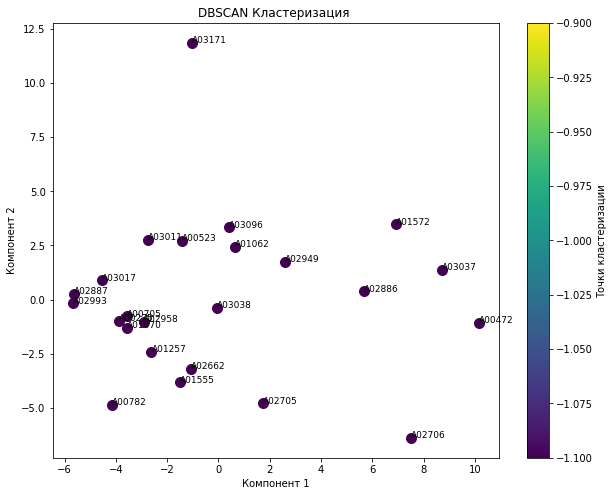

In [62]:
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  
clusters = dbscan.fit_predict(data_scaled)

# Уменьшение размерности для визуализации
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)


# Визуализация результатов кластеризации
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Генерация цветов для кластеров

for i, point in enumerate(data_reduced):
    cluster_index = np.where(unique_clusters == clusters[i])[0][0]  # Получение индекса для текущего кластера
    plt.scatter(point[0], point[1], color=colors[cluster_index], marker='o', s=100)
    plt.text(point[0], point[1], data_name[i], fontsize=9)  # Добавление названий аптек

plt.title("DBSCAN Кластеризация ")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(unique_clusters), vmax=max(unique_clusters))), label='Точки кластеризации')
plt.show()



In [63]:
from scipy.stats import ttest_ind, mannwhitneyu

data_class_1 = data_np[12]
data_class_2 = data_np[10]

mean_class_1 = np.mean(data_class_1)
median_class_1 = np.median(data_class_1)
std_class_1 = np.std(data_class_1)

mean_class_2 = np.mean(data_class_2)
median_class_2 = np.median(data_class_2 )
std_class_2 = np.std(data_class_2 )


t_test_result = ttest_ind(data_class_1, data_class_2)
mannwhitney_result = mannwhitneyu(data_class_1, data_class_2)

('Сред знач', mean_class_1, mean_class_2, 'Медиана', median_class_1, median_class_2,'Стандартное отклонение', std_class_1,std_class_2,  'Т тест', t_test_result,'U-тест Манна-Уитни', mannwhitney_result)


('Сред знач',
 5.96393915626311,
 6.461902336649894,
 'Медиана',
 0.004641529758220601,
 0.004378523075380219,
 'Стандартное отклонение',
 39.21322959426798,
 42.51280366230196,
 'Т тест',
 Ttest_indResult(statistic=-0.06326959025841346, pvalue=0.9496687825196535),
 'U-тест Манна-Уитни',
 MannwhitneyuResult(statistic=1537.0, pvalue=0.8859146751456674))

In [60]:
from scipy.stats import ttest_ind, mannwhitneyu

data_class_1 = data_np[4]
data_class_2 = data_np[23]

mean_class_1 = np.mean(data_class_1)
median_class_1 = np.median(data_class_1)
std_class_1 = np.std(data_class_1)

mean_class_2 = np.mean(data_class_2)
median_class_2 = np.median(data_class_2 )
std_class_2 = np.std(data_class_2 )


t_test_result = ttest_ind(data_class_1, data_class_2)
mannwhitney_result = mannwhitneyu(data_class_1, data_class_2)

('Сред знач', mean_class_1, mean_class_2, 'Медиана', median_class_1, median_class_2,'Стандартное отклонение', std_class_1,std_class_2,  'Т тест', t_test_result,'U-тест Манна-Уитни', mannwhitney_result)


('Сред знач',
 18.778953583739668,
 7.84608335299888,
 'Медиана',
 0.003591106979446689,
 0.005005845537632263,
 'Стандартное отклонение',
 124.67321835266867,
 53.756116793503,
 'Т тест',
 Ttest_indResult(statistic=0.5917407977286241, pvalue=0.5552608361451948),
 'U-тест Манна-Уитни',
 MannwhitneyuResult(statistic=1217.0, pvalue=0.07780730490922928))